# Modello di Ising implementato tramite Algoritmo di Metropolis

Modello di Ising in due dimensioni con Magnetico esterno assente:

$$ H = -J\sum_{\langle ij\rangle}S_{i}S_j,\qquad \qquad S_j\in\{\pm 1\} $$

Con <i,j> si intende la somma su tutti i primi vicini del reticolo e J è una costante dimensionale positiva. Per semplicità si è preso J=1.




## Funzioni 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def new_grid(L):
  grid=[]
  for i in range(L*L):
    grid.append(np.random.choice([-1,1]))
  grid=np.array(grid).reshape(L,L)
  return grid
  
def energy(grid):
    E = 0
    L=len(grid)
    for i in range(L):
        for j in range(L):
            s = grid[i,j]
            nb = grid[(i+1)%L, j] + grid[i,(j+1)%L] + grid[(i-1)%L, j] + grid[i,(j-1)%L]
            E += -nb*s
    return E/2 #altrimenti contiamo doppiamente le interazioni.  

class Config:
  def __init__(self, L, T):
    self.L= L
    self.T = T
    self.grid = new_grid(L)
    self.E = energy(self.grid)
    self.magn= np.sum(self.grid)
    self.beta=1/T

    
def MCmove(Config):
  L=Config.L
  beta= Config.beta
  grid=Config.grid
  a = np.random.randint(0, L)
  b = np.random.randint(0, L)
  s = grid[a,b]
  nb = grid[(a+1)%L,b] + grid[a,(b+1)%L] + grid[(a-1)%L,b] + grid[a,(b-1)%L]
  de = 2*s*nb
  
  if de < 0 :
    s *= -1
    grid[a, b] = s
    Config.grid= grid
    Config.E += de
    Config.magn += 2*s 
  elif np.random.rand() < np.exp(-de*beta): 
    s *= -1
    grid[a, b] = s
    Config.grid= grid
    Config.E += de
    Config.magn += 2*s

  return Config

## Main

In [4]:
temp= np.linspace(1.5,3.5,50) #range di Temperature esplorate
sizes=[8,16,32] #taglie del sistema simulare
m=np.zeros(shape=(len(sizes),len(temp)))
e=np.zeros(shape=(len(sizes),len(temp)))

N=[1e5,(1e6)*5,1e7] #MC steps
Nterm=[1e4,1e5,1e6] #MC steps

j=0
for L in sizes:
  i=0
  for T in temp:
    x=Config(L,T)
    m[j][i]=x.magn  
    e[j][i]=x.E
    for n in range(int(Nterm[j])):
      x=MCmove(x)
    for n in range(int(N[j])):
      x=MCmove(x)
      m[j][i]+= x.magn
      e[j][i]+= x.E
    m[j][i]=m[j][i]/(N[j]*L**2) 
    e[j][i]=e[j][i]/(N[j]*L**2)
    #print(j,i)
    i+=1
  j+=1


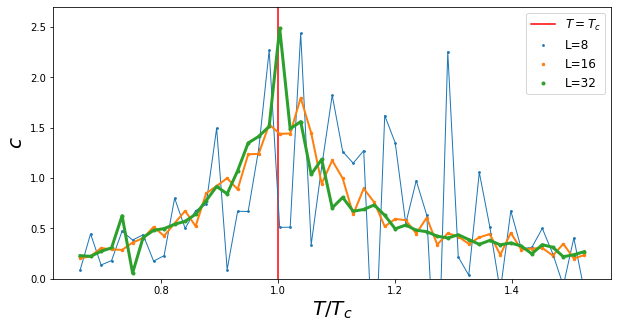

In [24]:
#Heat Capacity dE/dT
Tc=2.269

c=['#1f77b4' ,'#ff7f0e', '#2ca02c','#9467bd']
C=[]; 
for j in range(len(sizes)):
    for i in range(len(temp)-1):
        C.append((e[j][i+1]-e[j][i])/(temp[i+1]-temp[i]))
C=np.reshape(C,(len(sizes), len(temp)-1)) 


l=[1,2,3]
s=[3,6,9]
plt.figure(figsize=(10, 5))
plt.axvline(x=1, color="r",label="$T=T_c$")
for i in range(len(sizes)):
    plt.scatter(temp[0:-1]/Tc,C[i,:], s=s[i], color=c[i],label='L={}'.format(sizes[i]))
    plt.plot(temp[:-1]/Tc,C[i,:], c=c[i], lw=l[i])
plt.ylabel("$c$", fontsize=20)
plt.xlabel("$T/T_c$", fontsize = 20)
plt.legend(fontsize=12)
plt.ylim(0,2.7)
plt.savefig("heatcap.pdf")
plt.show()



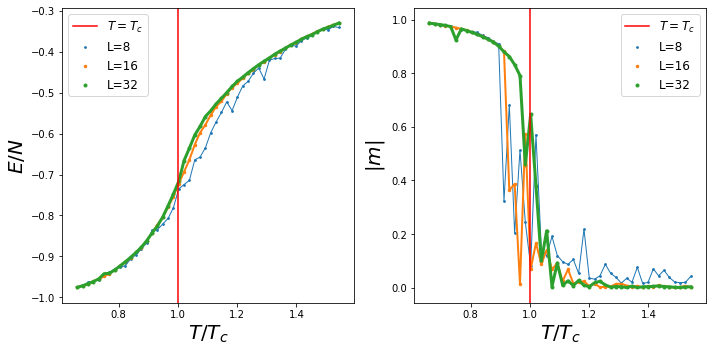

In [20]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
for j in range(len(sizes)):
  ax.scatter(temp/Tc, e[j]/2, s=s[j], color=c[j],label='L={}'.format(sizes[j]))
  ax.plot(temp/Tc, e[j]/2, c=c[j], lw=l[j])
plt.axvline(x=1, color="r",label="$T=T_c$")
plt.xlabel("$T/T_c$", fontsize = 20)
plt.ylabel("$E/N$", fontsize=20)
plt.legend(fontsize=12)

ax = fig.add_subplot(1, 2, 2)
for j in range(len(sizes)):
  ax.scatter(temp/Tc, np.abs(m[j]), s=s[j], color=c[j],label='L={}'.format(sizes[j]))
  ax.plot(temp/Tc, np.abs(m[j]), c=c[j], lw=l[j])
plt.axvline(x=1, color="r",label="$T=T_c$")
plt.ylabel("$|m|$", fontsize=20)
plt.xlabel("$T/T_c$", fontsize = 20)
plt.legend(fontsize=12)




plt.tight_layout()
plt.savefig("taglia.pdf")
plt.show()

## Visualizzazione di alcune simulazioni:

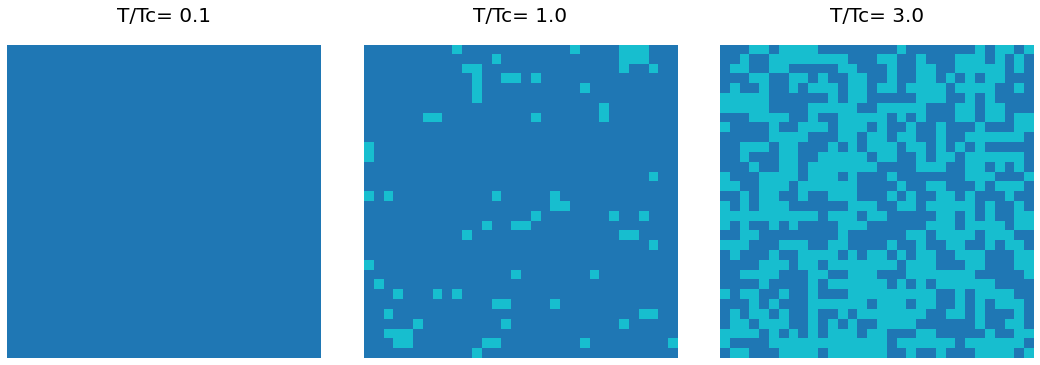

In [7]:
#prendiamo una particolare configurazione e 
#facciamola evolvere a temperature diverse:
L=32
N=int(1e6)
Tc=2.269

testing_T=[0.1*Tc, Tc, 3*Tc]


fig = plt.figure(figsize=(15, 5))
i=1
for T in testing_T:
  x=Config(L,T)
  for n in range (N):
    x=MCmove(x)

  ax = fig.add_subplot(1, 3, i)
  ax.matshow(x.grid, cmap="tab10")
  ax.set_title('T/Tc= {}'.format(x.T/Tc), fontsize=20)
  ax.set_axis_off()
  i+=1

plt.tight_layout()
plt.show()



